In [207]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# 80 delayu, 40 chirpu

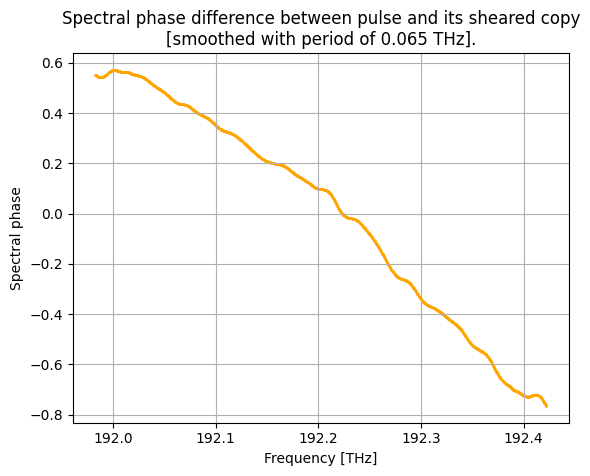

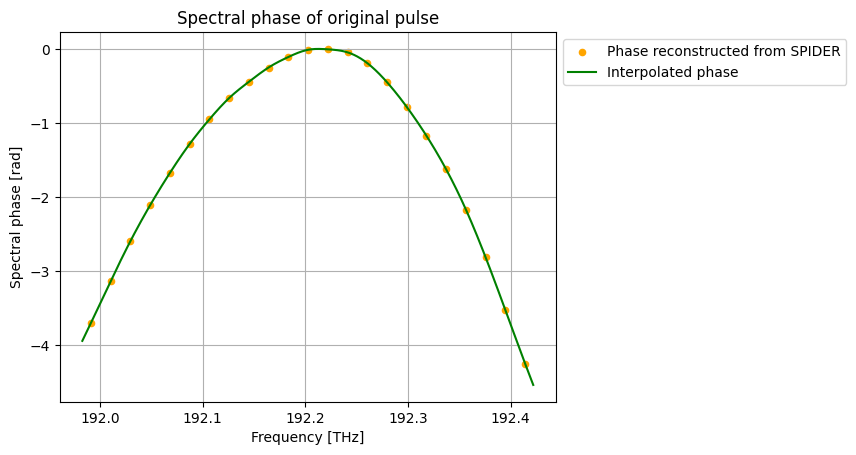

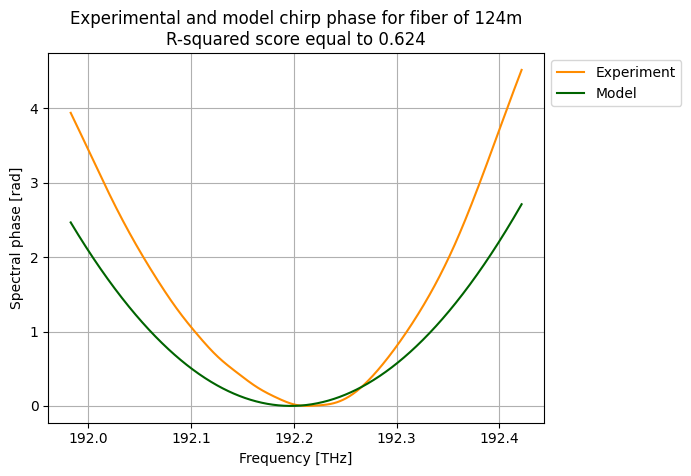

0.624028490715028


In [227]:
phase_ex_com_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        plot_pulse = False,
        find_shear = "center of mass",
        sheared_is_bigger = True,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_ex_com_40, 124, True))

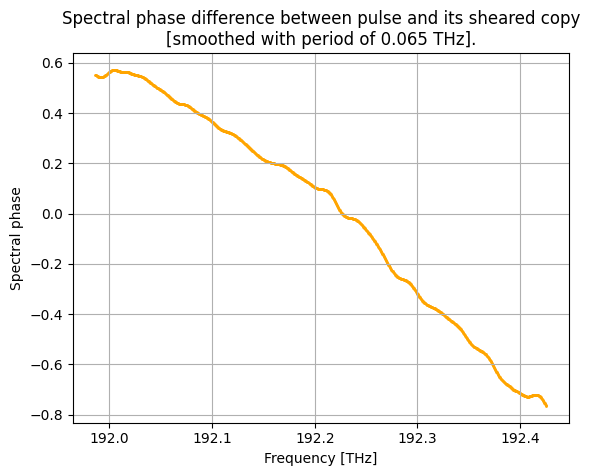

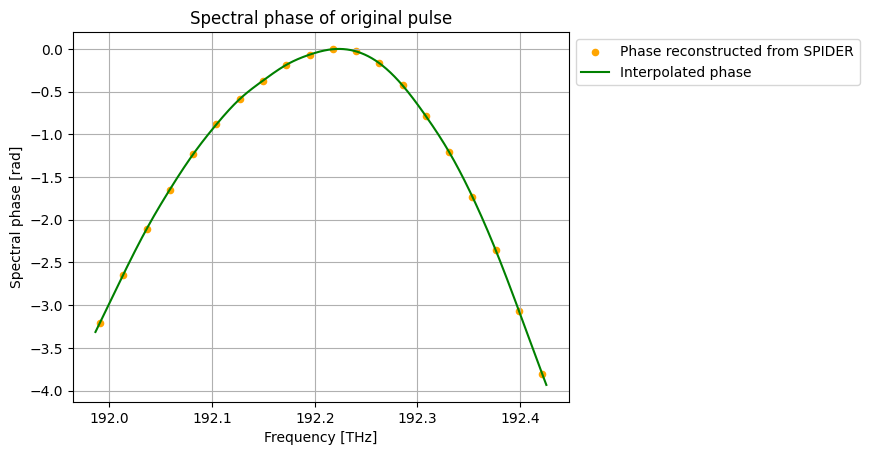

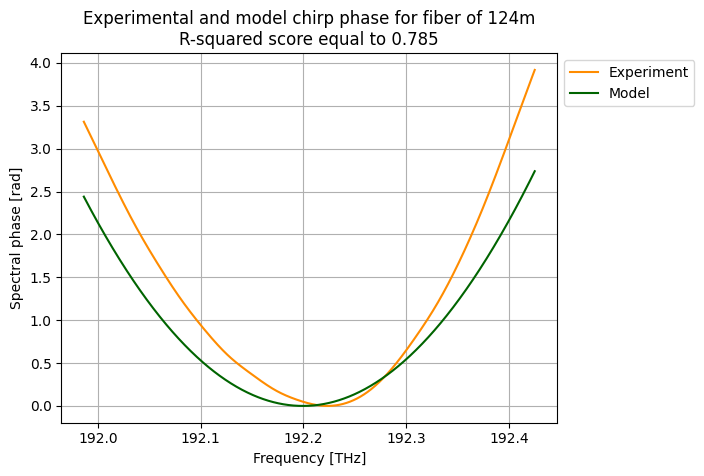

0.7854607587384921


In [230]:
phase_ex_ls_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        find_shear = "least squares",
        sheared_is_bigger = True,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_ex_ls_40, 124, True))

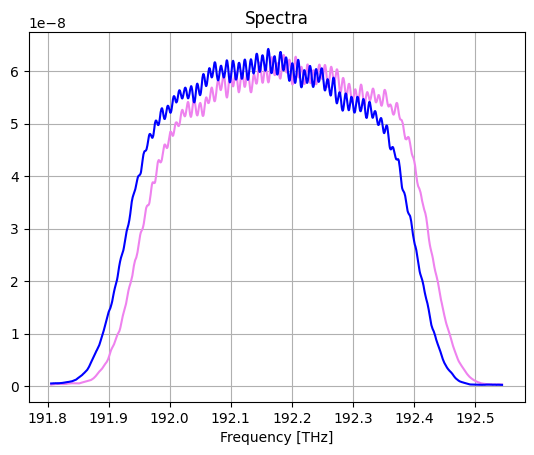

In [210]:
sheared = sa.load_csv("data/80del40chirp_sheared.csv")
not_sheared = sa.load_csv("data/80del40chirp_not_sheared.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()
sheared.constant_spacing()
not_sheared.constant_spacing()

shear40ls = sa.find_shift(sheared, not_sheared)
shear40com = sheared.quantile(0.5) - not_sheared.quantile(0.5)

sa.compare_plots([sheared, not_sheared])

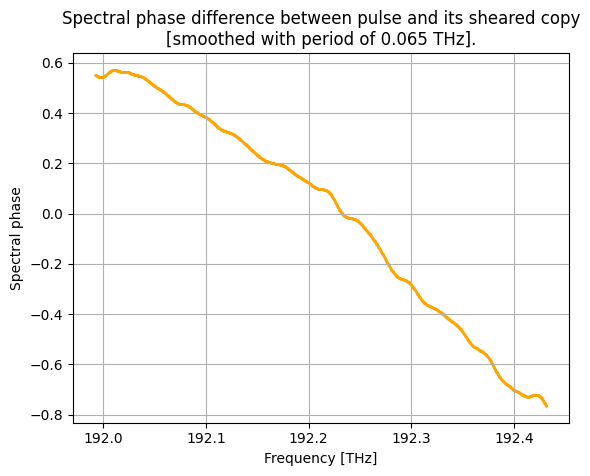

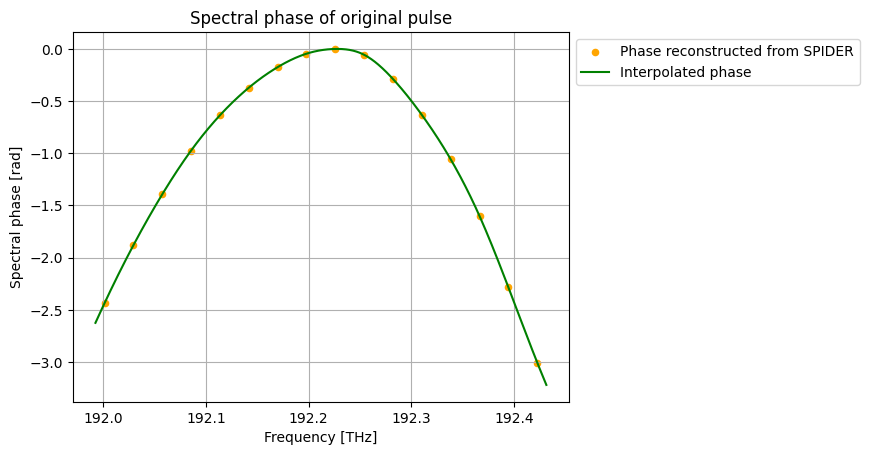

0.02148425370306494


In [211]:
phase_meas_com_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        shear = shear40com,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_meas_com_40, True))

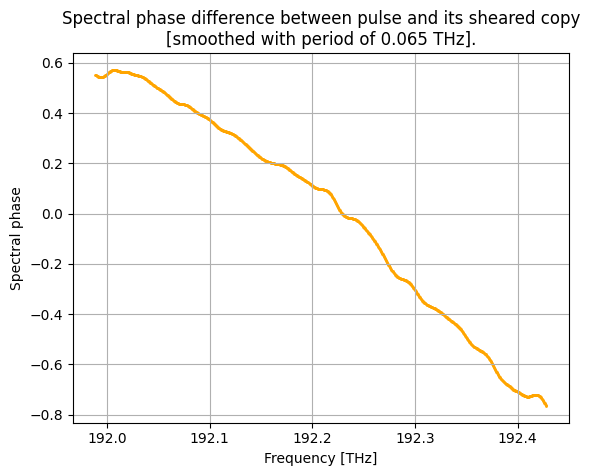

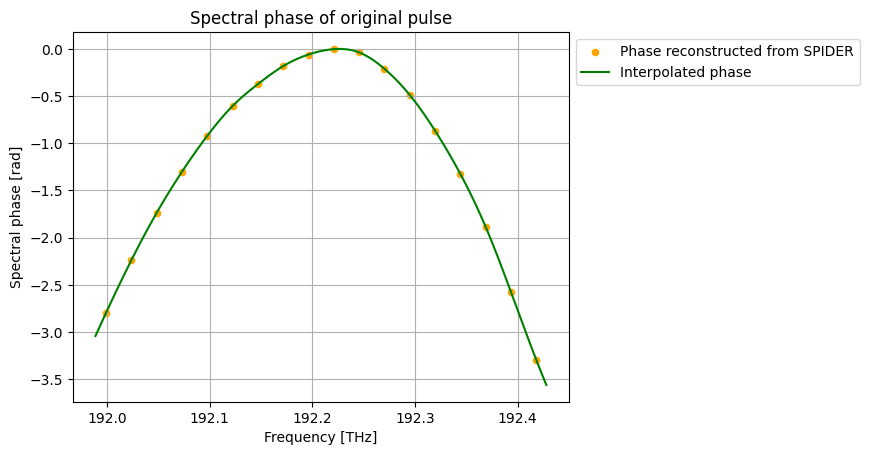

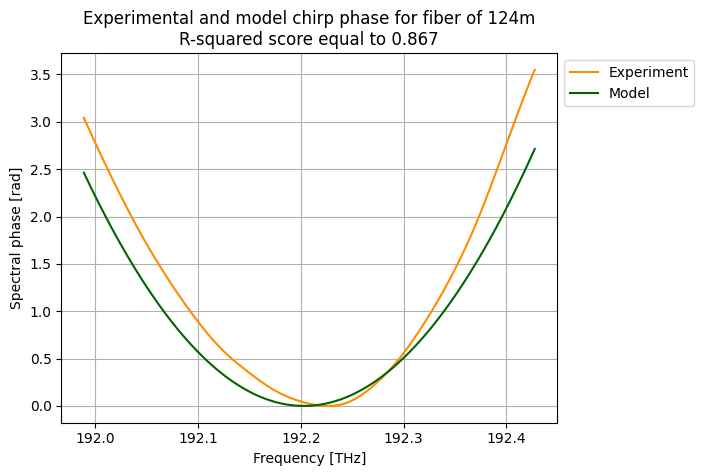

0.8673103675271098


In [212]:
phase_meas_ls_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        shear = shear40ls,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_meas_ls_40, 124, True))

In [213]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

omega = np.linspace(191.98, 192.43, 1000)
omega_mean = 192.24
fiber_length = 124
phase = phase(omega, omega_mean, fiber_length)

sim_phase_40 = sa.spectrum(omega, phase, x_type = "freq", y_type = "phase")

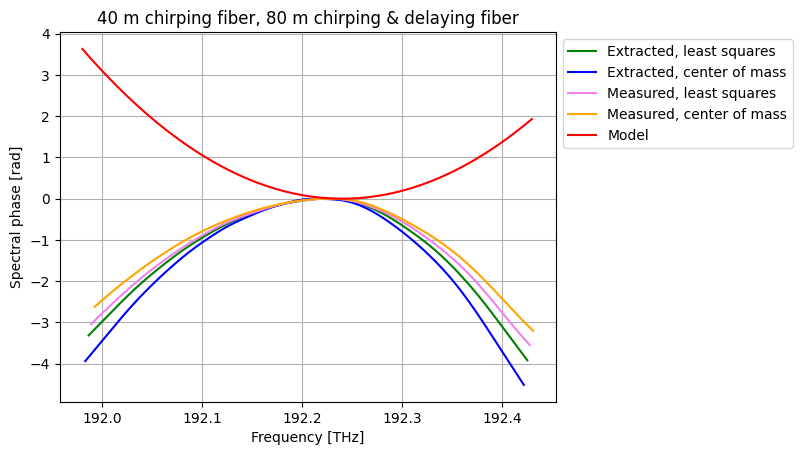

In [214]:
sa.compare_plots([phase_ex_ls_40, phase_ex_com_40, phase_meas_ls_40, phase_meas_com_40, sim_phase_40],
legend = ["Extracted, least squares", "Extracted, center of mass", "Measured, least squares", "Measured, center of mass", "Model"],
colors = ["green", "blue", "violet", "orange", "red"],
title = "40 m chirping fiber, 80 m chirping & delaying fiber")

# 80 delayu 20 chirpu

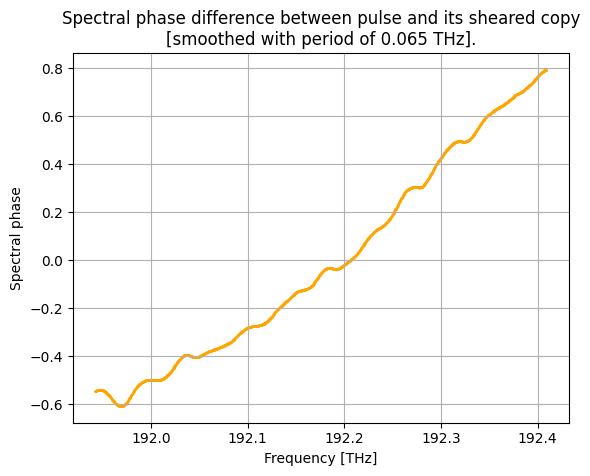

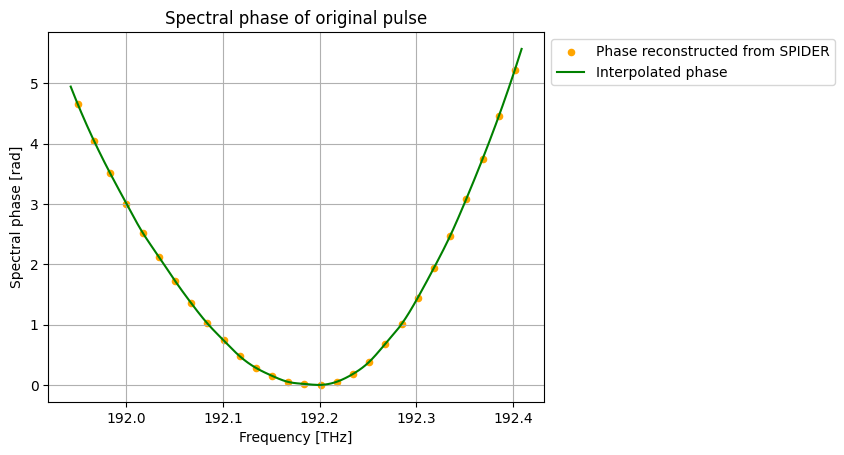

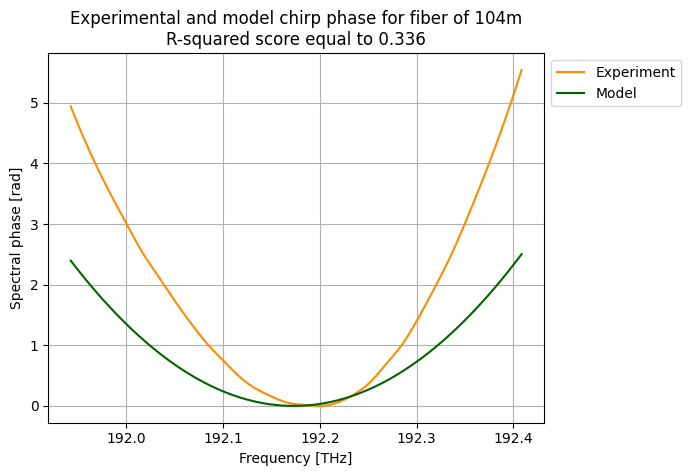

0.33607582319080087


In [233]:
phase_ex_com_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        find_shear = "center of mass",
        sheared_is_bigger = True,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_ex_com_20, 104, True))

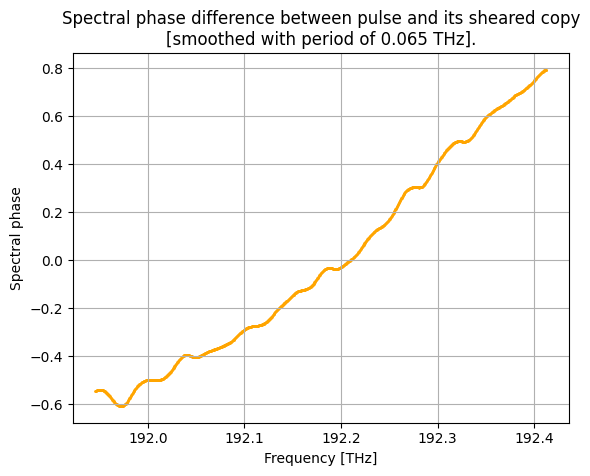

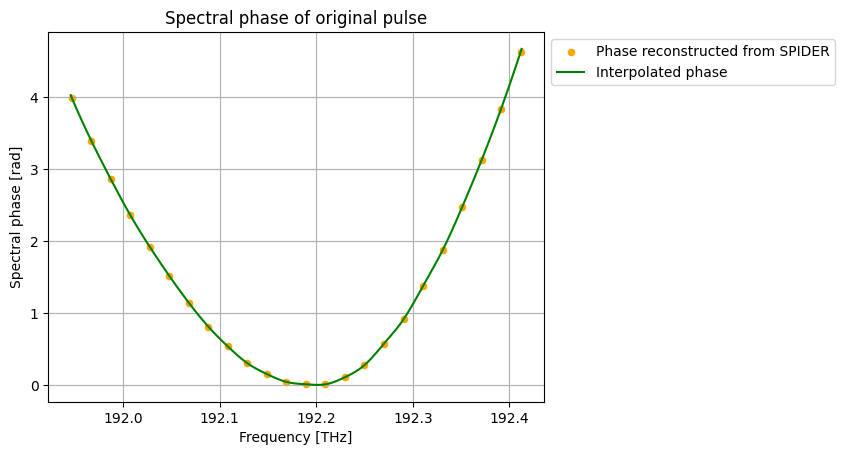

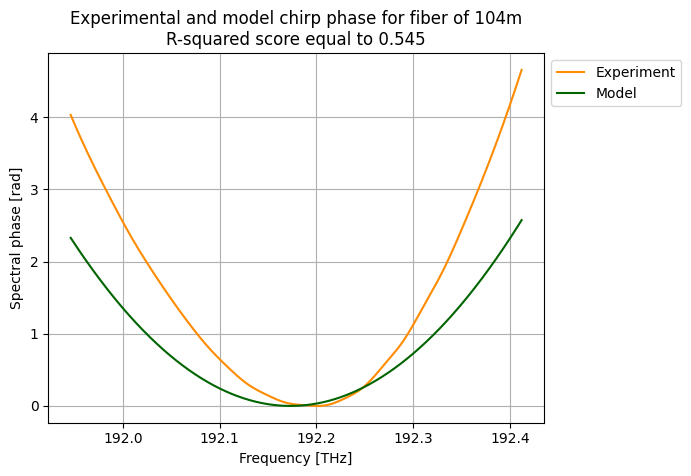

0.5445261106555422


In [216]:
phase_ex_ls_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_ex_ls_20, 104, True))

In [217]:
sheared = sa.load_csv("data/80del20chirp_sheared.csv")
not_sheared = sa.load_csv("data/80del20chirp_not_sheared.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()
sheared.constant_spacing()
not_sheared.constant_spacing()

shear20ls = np.abs(sa.find_shift(sheared, not_sheared))
shear20com = np.abs(sheared.quantile(0.5) - not_sheared.quantile(0.5))

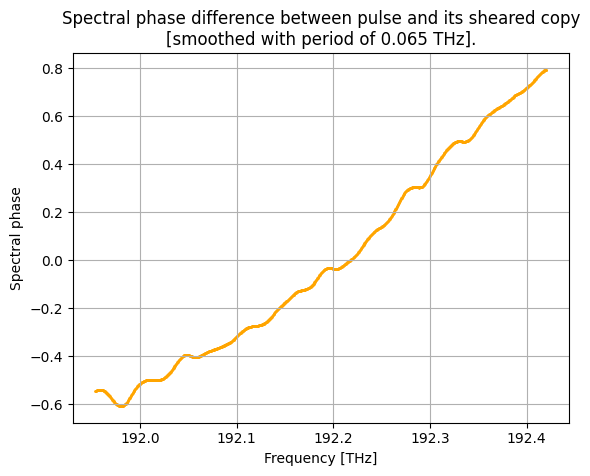

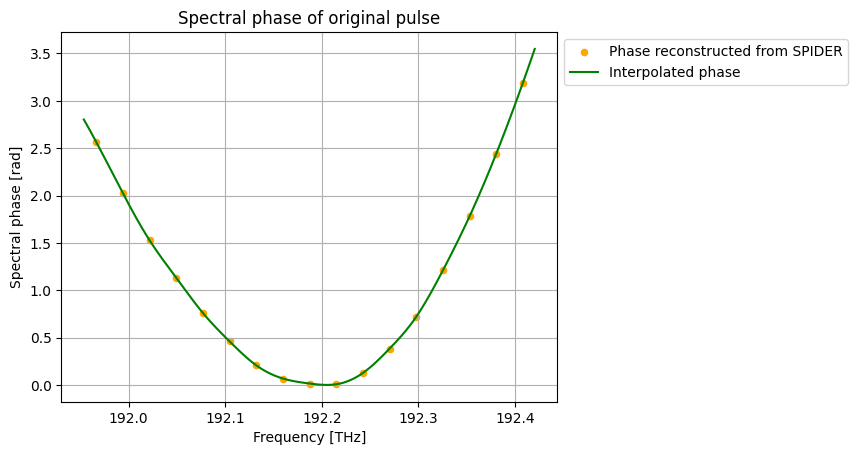

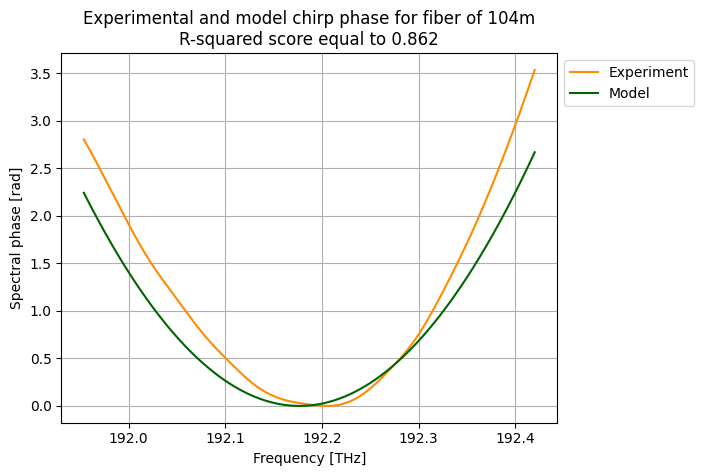

0.8620992134652391


In [218]:
phase_meas_ls_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        shear = shear20ls,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_meas_ls_20, 104, True))

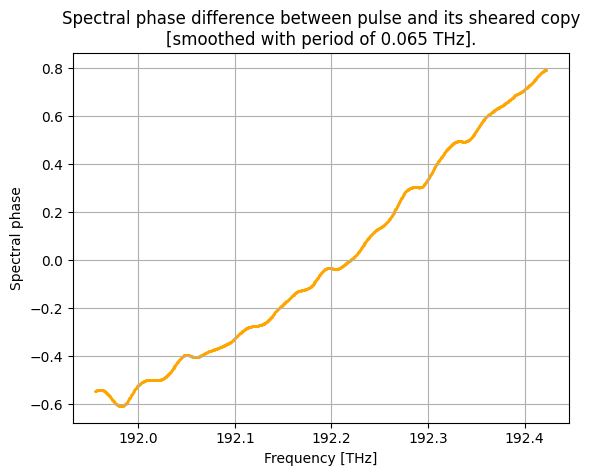

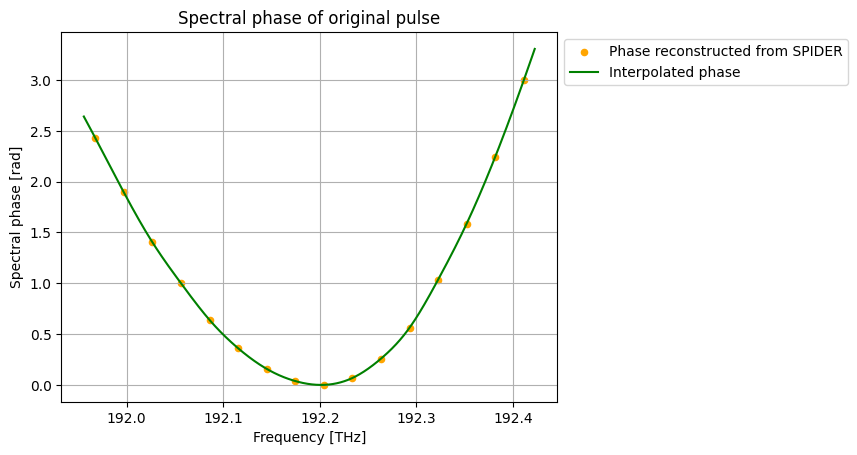

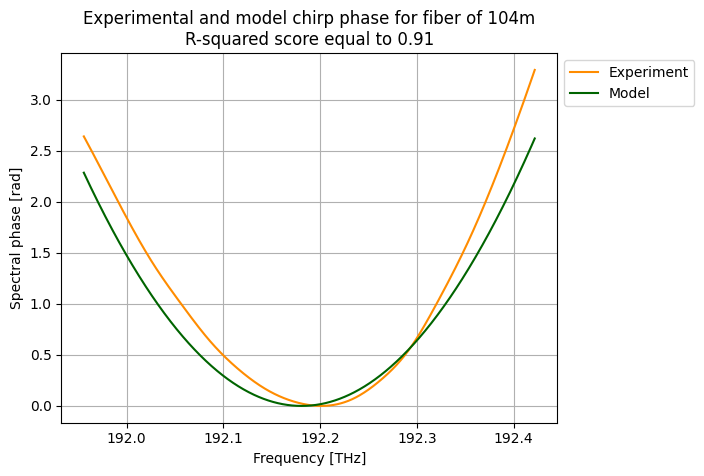

0.9104007838753511


In [219]:
phase_meas_com_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = False,
        shear = shear20com,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

print(sa.chirp_r2(phase_meas_com_20, 104, True))

In [220]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

omega = np.linspace(191.98, 192.43, 1000)
omega_mean = 192.19
fiber_length = 104
spectral_phase = phase(omega, omega_mean, fiber_length)

sim_phase_20 = sa.spectrum(omega, spectral_phase, x_type = "freq", y_type = "phase")

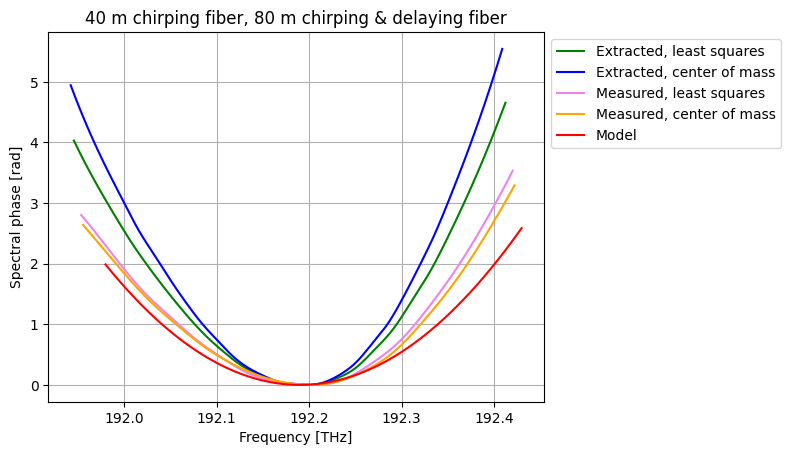

In [221]:
sa.compare_plots([phase_ex_ls_20, phase_ex_com_20, phase_meas_ls_20, phase_meas_com_20, sim_phase_20],
legend = ["Extracted, least squares", "Extracted, center of mass", "Measured, least squares", "Measured, center of mass", "Model"],
colors = ["green", "blue", "violet", "orange", "red"],
title = "40 m chirping fiber, 80 m chirping & delaying fiber")

# 40 vs 20 m

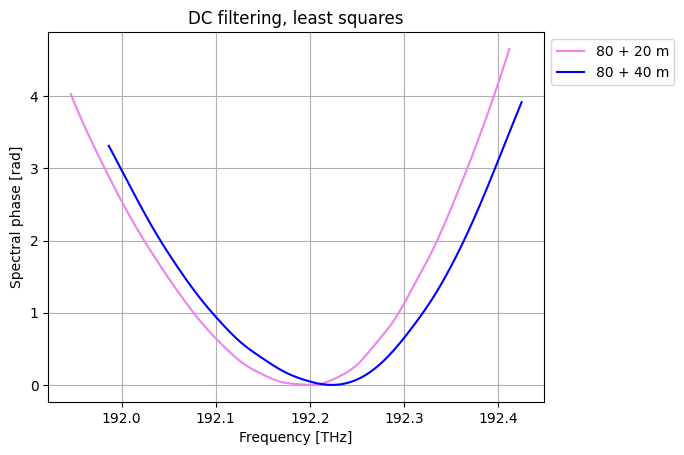

In [222]:
phase_ex_ls_40. Y *= -1
sa.compare_plots([phase_ex_ls_20, phase_ex_ls_40], title = "DC filtering, least squares", 
                 legend = ["80 + 20 m", "80 + 40 m"])

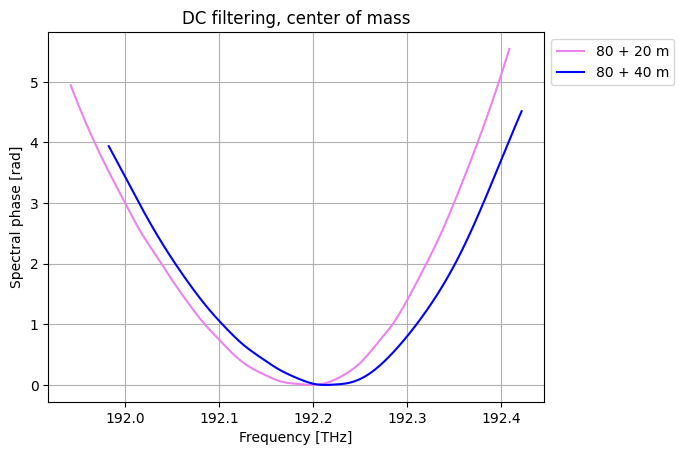

In [223]:
phase_ex_com_40. Y *= -1
sa.compare_plots([phase_ex_com_20, phase_ex_com_40], title = "DC filtering, center of mass", 
                 legend = ["80 + 20 m", "80 + 40 m"])

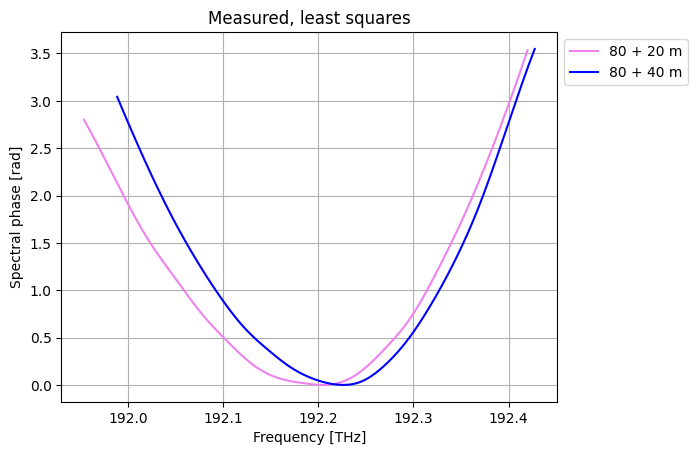

In [224]:
phase_meas_ls_40. Y *= -1
sa.compare_plots([phase_meas_ls_20, phase_meas_ls_40], title = "Measured, least squares", 
                 legend = ["80 + 20 m", "80 + 40 m"])

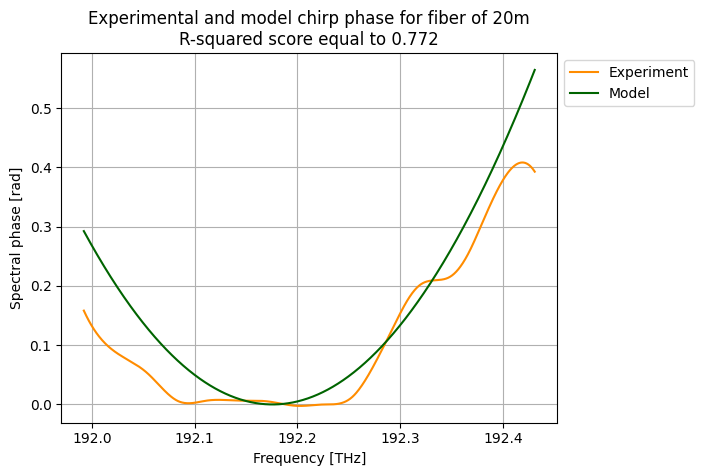

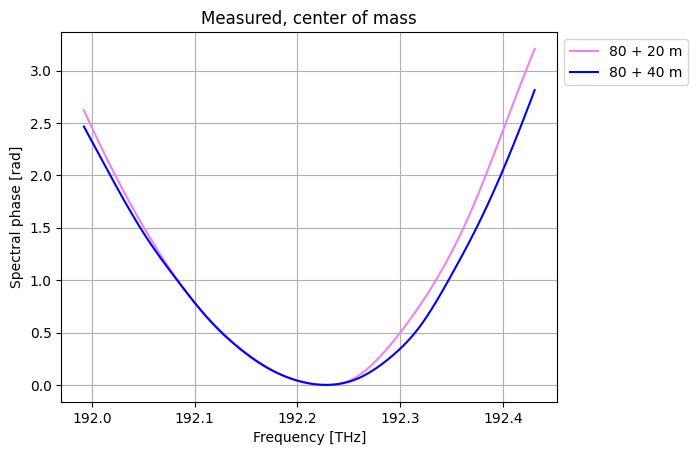

In [225]:
if np.mean(phase_meas_com_40.Y) < 0: phase_meas_com_40.Y *= -1

s1 = phase_meas_com_40.copy()
s2 = phase_meas_com_20.copy()

x_min_1 = s1.X[np.argmin(s1.Y)]
x_min_2 = s2.X[np.argmin(s2.Y)]
delta = x_min_1 - x_min_2

s2.shift(delta)
s2.cut(s1.X[0], s1.X[-1])

s3 = s1.copy()
s3.Y -= s2.Y

sa.chirp_r2(s3, 20, True)

sa.compare_plots([s1, s2], title = "Measured, center of mass", 
                 legend = ["80 + 20 m", "80 + 40 m"])